In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,7)
plt.style.use('seaborn')

dt_dolar_price = pd.read_csv('../DataSet/Foreign_Exchange_Rates.csv')
# dt_dolar_price.info() TODO

dt_br_dolar_price = dt_dolar_price[['BRAZIL - REAL/US$']]

dt_br_dolar_price['date'] = pd.to_datetime(dt_dolar_price['Time Serie']).dt.to_period('M')
dt_br_dolar_price = dt_br_dolar_price.set_index('date')['2011':'2019']

# dt_br_dolar_price['Time Serie'] = pd.to_datetime(dt_br_dolar_price['Time Serie'], format='%Y-%m-%d')
# dt_br_dolar_price['month'] = pd.DatetimeIndex(dt_br_dolar_price['Time Serie']).month
# dt_br_dolar_price['year'] = pd.DatetimeIndex(dt_br_dolar_price['Time Serie']).year
dt_br_dolar_price.rename(columns= {'BRAZIL - REAL/US$': 'brazil_usd'}, inplace=True)

dt_br_dolar_price = dt_br_dolar_price.replace('ND', np.NaN)

dt_br_dolar_price.dropna(subset = ["brazil_usd"], inplace=True)

dt_br_dolar_price["brazil_usd"] = dt_br_dolar_price.brazil_usd.astype(float)

# dt_br_dolar_price = dt_br_dolar_price.groupby(by=['year', 'month']).mean()
# dt_br_dolar_price.plot()
dt_br_dolar_price.sample(5)





C:\Users\lucas\AppData\Local\Temp\ipykernel_29296\4045272485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_br_dolar_price['date'] = pd.to_datetime(dt_dolar_price['Time Serie']).dt.to_period('M')


,brazil_usd
date,
2019-05,3.9658
2012-09,2.0330
2018-11,3.8205
2019-06,3.8740
2015-04,2.9393


In [456]:
original_gas_price_dt = pd.read_csv (r'..\\DataSet/2004-2021.tsv', sep = '\t')
is_gas = original_gas_price_dt['PRODUTO']=="GASOLINA COMUM"
df_gas = original_gas_price_dt[is_gas]

In [457]:
df_gas['DATA FINAL'] = pd.to_datetime(df_gas['DATA FINAL'])

df_gas['PREÇO MÉDIO REVENDA'] = pd.to_numeric(df_gas['PREÇO MÉDIO REVENDA'], errors='coerce')

df_gas.set_index(['DATA FINAL'], inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_29296\3356634510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gas['DATA FINAL'] = pd.to_datetime(df_gas['DATA FINAL'])
C:\Users\lucas\AppData\Local\Temp\ipykernel_29296\3356634510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gas['PREÇO MÉDIO REVENDA'] = pd.to_numeric(df_gas['PREÇO MÉDIO REVENDA'], errors='coerce')


In [458]:
used_columns = [
    'DATA',
    'REGIÃO',
    'PREÇO MÉDIO REVENDA',
]

monthly_df = df_gas.groupby(['REGIÃO']).resample('M').mean().reset_index()
monthly_df['DATA'] = monthly_df['DATA FINAL'].dt.to_period('M')

gas_prices_df = monthly_df[used_columns]
gas_prices_df = gas_prices_df.dropna(how='any')

gas_prices_df.set_index(['DATA'], inplace=True)
gas_prices_df.sample(n=5)

,REGIÃO,PREÇO MÉDIO REVENDA
DATA,,
2010-09,NORDESTE,2.603722
2011-07,SUDESTE,2.809500
2009-10,CENTRO OESTE,2.657800
2012-11,SUL,2.742250
2017-09,SUL,3.864400


In [459]:
dolar_gas_price_dt = gas_prices_df.copy()
dolar_gas_price_dt.reset_index(inplace=True)
dolar_gas_price_dt.set_index('DATA', inplace=True)
dolar_gas_price_dt

,REGIÃO,PREÇO MÉDIO REVENDA
DATA,,
2004-05,CENTRO OESTE,2.131500
2004-06,CENTRO OESTE,2.174625
2004-07,CENTRO OESTE,2.227550
2004-08,CENTRO OESTE,2.278875
2004-09,CENTRO OESTE,2.292500
...,...,...
2021-01,SUL,4.515600
2021-02,SUL,4.845167
2021-03,SUL,5.411750


<AxesSubplot:xlabel='DATA'>

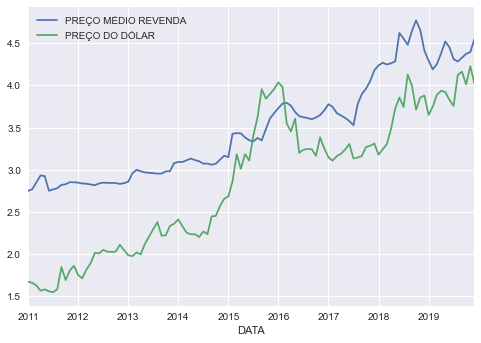

In [460]:
region_centro_oeste = dolar_gas_price_dt['REGIÃO']=="CENTRO OESTE"
dolar_gas_price_dt = dolar_gas_price_dt[region_centro_oeste]

dolar_gas_price_dt.reset_index(inplace=True)
dolar_gas_price_dt.set_index('DATA', inplace=True)

dolar_gas_price_dt = dolar_gas_price_dt.to_timestamp()
dt_br_dolar_price = dt_br_dolar_price.to_timestamp()

dolar_gas_price_dt = dolar_gas_price_dt['2011':'2019']

dt_br_dolar_price.reset_index(inplace=True)

dt_br_dolar_price.drop_duplicates(subset ="date",
                     keep = 'last', inplace = True)

dt_br_dolar_price.set_index('date', inplace=True)
dolar_gas_price_dt['PREÇO DO DÓLAR'] = dt_br_dolar_price['brazil_usd']

dolar_gas_price_dt.plot()

In [461]:
all_region_dolar_gas_price_dt = gas_prices_df.copy()
all_region_dolar_gas_price_dt.reset_index(inplace=True)
all_region_dolar_gas_price_dt.set_index('DATA', inplace=True)

all_region_dolar_gas_price_dt = all_region_dolar_gas_price_dt.groupby(by=['DATA', 'REGIÃO']).mean()
all_region_dolar_gas_price_dt



PREÇO MÉDIO REVENDA
DATA    REGIÃO                           
2004-05 CENTRO OESTE             2.131500
        NORDESTE                 2.042185
        NORTE                    2.204810
        SUDESTE                  1.983167
        SUL                      2.055111
...                                   ...
2021-05 CENTRO OESTE             5.587000
        NORDESTE                 5.390000
        NORTE                    5.544143
        SUDESTE                  5.672500
        SUL                      5.381000

[1020 rows x 1 columns]